In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate, optimize

In [11]:
data = pd.read_csv("all.am", comment="#", delimiter="\s+", header=None, 
            engine="python", 
            converters={"-": 111110},
            na_values="-", keep_default_na=True)

In [12]:
with open("satpoints_brown.csv", "w") as file:
    file.write("label,rho0,E/A\n")
    for icol, col in enumerate(data.columns[1:], start=1):
        label = f"brown:{icol}"  # unclear how to map results in Alex Brown's recent data file to EDFs labels
        fint = interpolate.interp1d(data[0],data[col], kind="cubic")
        sol = optimize.minimize(fint, x0=0.15, args=(), method='Nelder-Mead')
        #print((f"{sol.x[0]},{sol.fun}"))
        file.write(f"{label},{sol.x[0]:.5f},{sol.fun:.5f}\n")

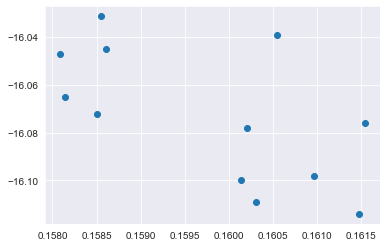

In [9]:
data = pd.read_csv("satpoints_brown.csv", header=0)
plt.scatter(data["rho0"], data["E/A"])